# First steps with scikit-learn

I presume that until now you were mainly using Pandas for Data Science. As you heard within our "Introduction to Feature Engineering", there is a good reason why we should expand our library toolkit with one that is more suited for **stateful transformations** - such as *scikit-learn*. Afterwards, we are also going to use it for **Machine Learning**.

In this notebook, we will:


1.   Learn the basics about the sklearn documentation
2.   Learn how to operate the core API (fit-transform/predict)
3.   Learn how to imagine advanced api (composite estimators)

## 1. Documentation of sklearn

Here is the homepage:  

https://scikit-learn.org/stable/

Please focus on the menu on the top, as this is the most important for us.


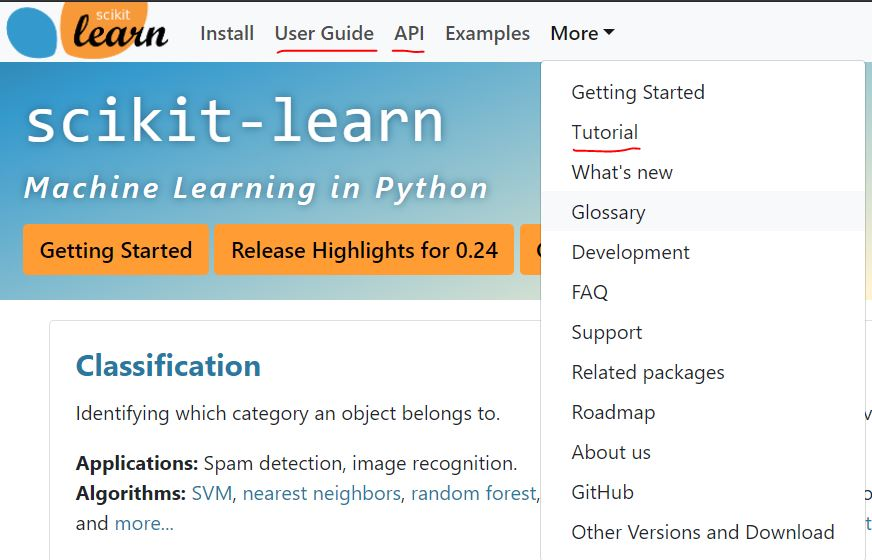

The three most important tabs for us are:


1.   **User Guide**. We will head over here for *thorough guidelines* within a certain topic (e.g. Decision Trees).
2.   **API**. We will use this whenever we want to learn about a *particular method or module* (e.g. sklearn.impute).
3.   **Tutorial**. We can use these for some *starting tutorials* (e.g. loading artificial datasets).



## 1.1 User Guide  

User guides are amazing! These are not only a great resource for when we want to perform some operation in sklearn, but also when we want to learn about some topic. There is one important point to remember through: User guides usually cover _everything_ that sklearn offers on a certain topic. This means that the user guide contains basic, and advanced approaches at the same time. **It is therefore important to not get discouraged if you are not able to follow everything in the user guides**. 

Please go ahead and give the user guide on Preprocessing Data a try. This is among the first topics we will cover.  
https://scikit-learn.org/stable/modules/preprocessing.html

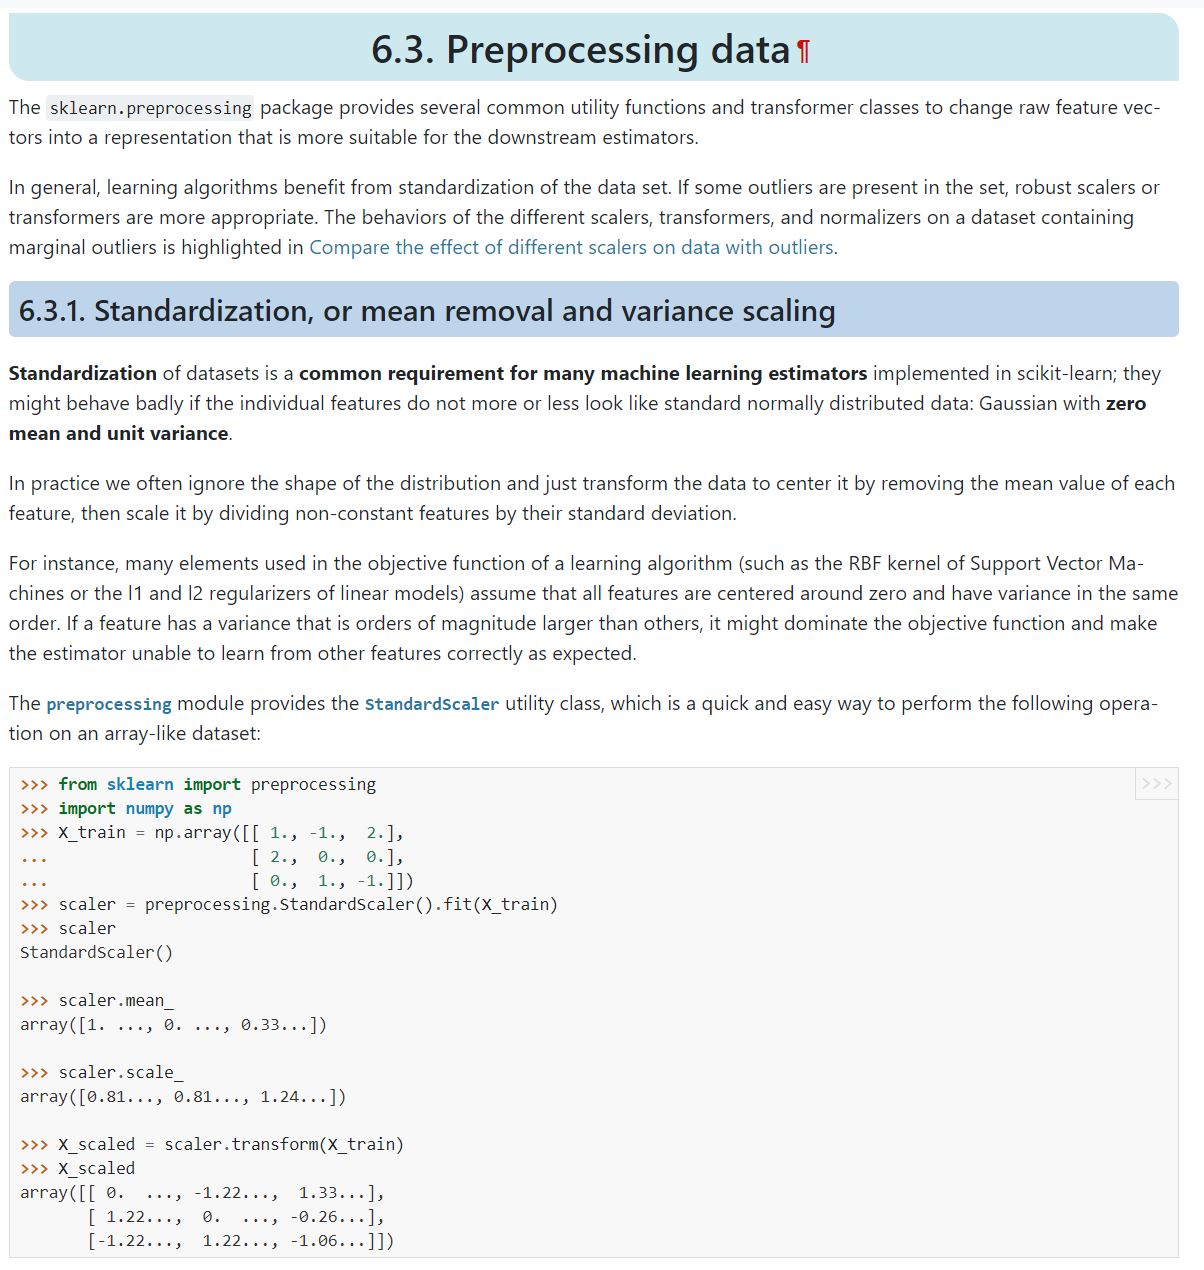

## 1.2 API
The actual transformers and estimators that we have available within sklearn are neatly documented within the API tab. **Sklearn consists of modules**. You can see a list of modules on the left side. Our first task will be to learn which modules are the most important for us when we are starting with Data Science. Clearly, the preprocessing module will be very useful. If you click on it, the following will appear.

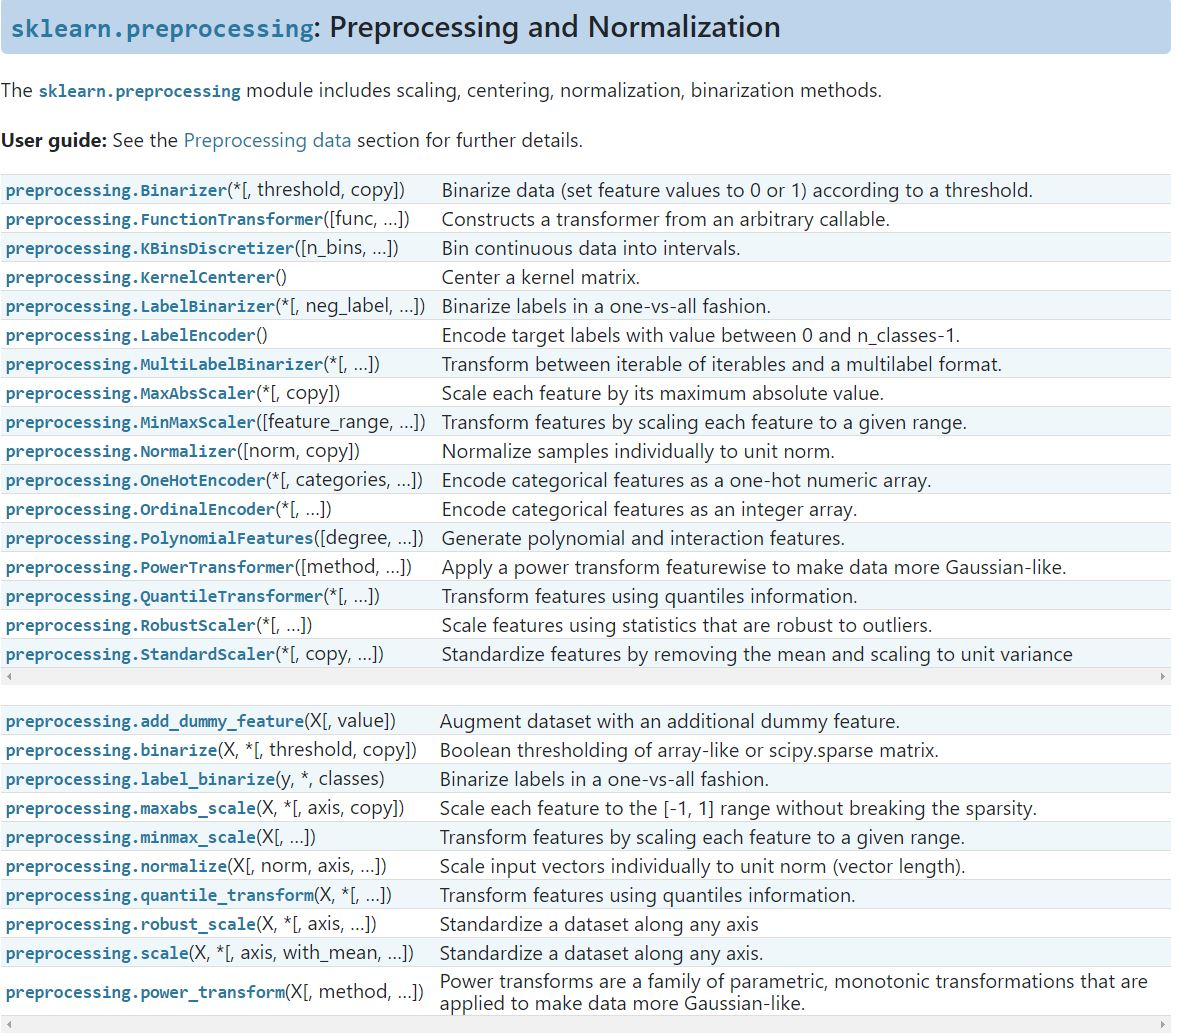

These are all the estimators and transformers that are available within the preprocessing module. Also, you can notice a nice cross-reference to relevant user guides. Our second task will be to understand the most important transformers within a certain module as again, it offers some essential functionalities as well as advanced functionalities.  

For example, one of the first transformers that we will practice with is **MinMaxScaler**. Please go ahead and click on it. The following page will appear. At the top you usually have a conceptual description of what this transformer does.

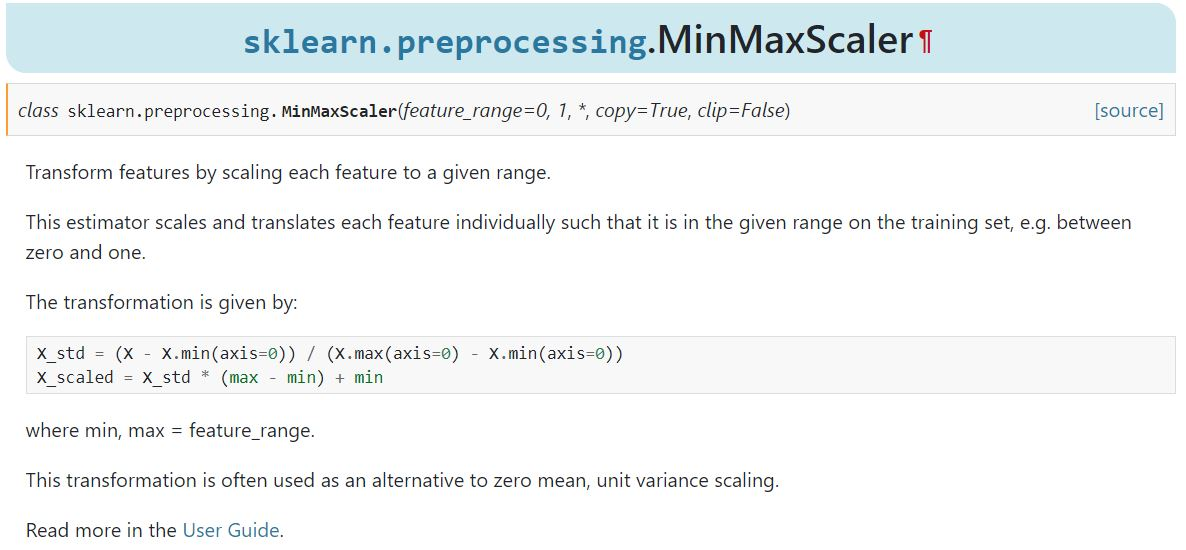

Just below of it, you will see the usable **parameters** for this estimator or transformer.

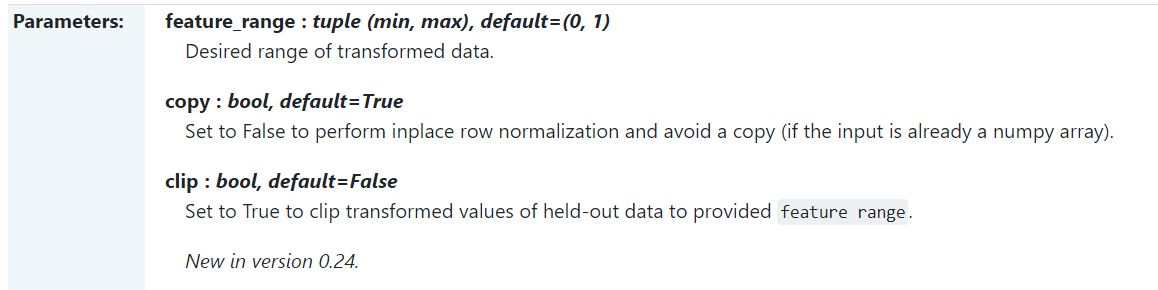

If you scroll further down, you will see **attributes**. These are useful when we, for example, have already fitted the transformer and would like to examine the states that it learned.

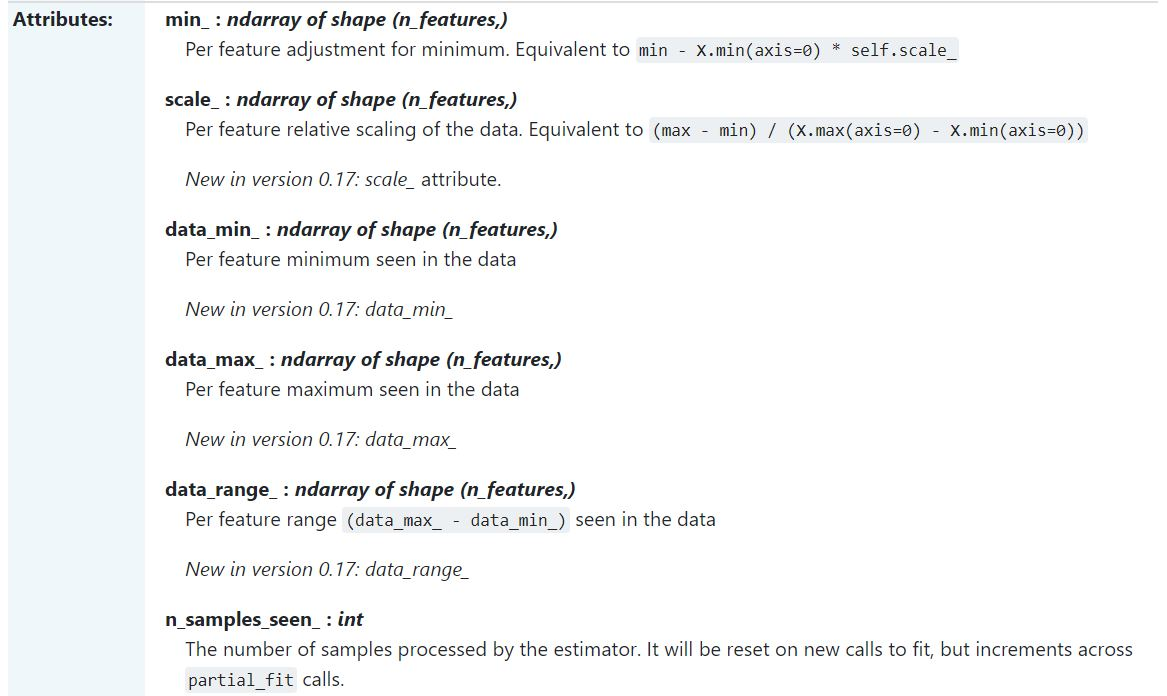

And finally, if you scroll further down, you will see **methods** that are available with given estimator or transformer.

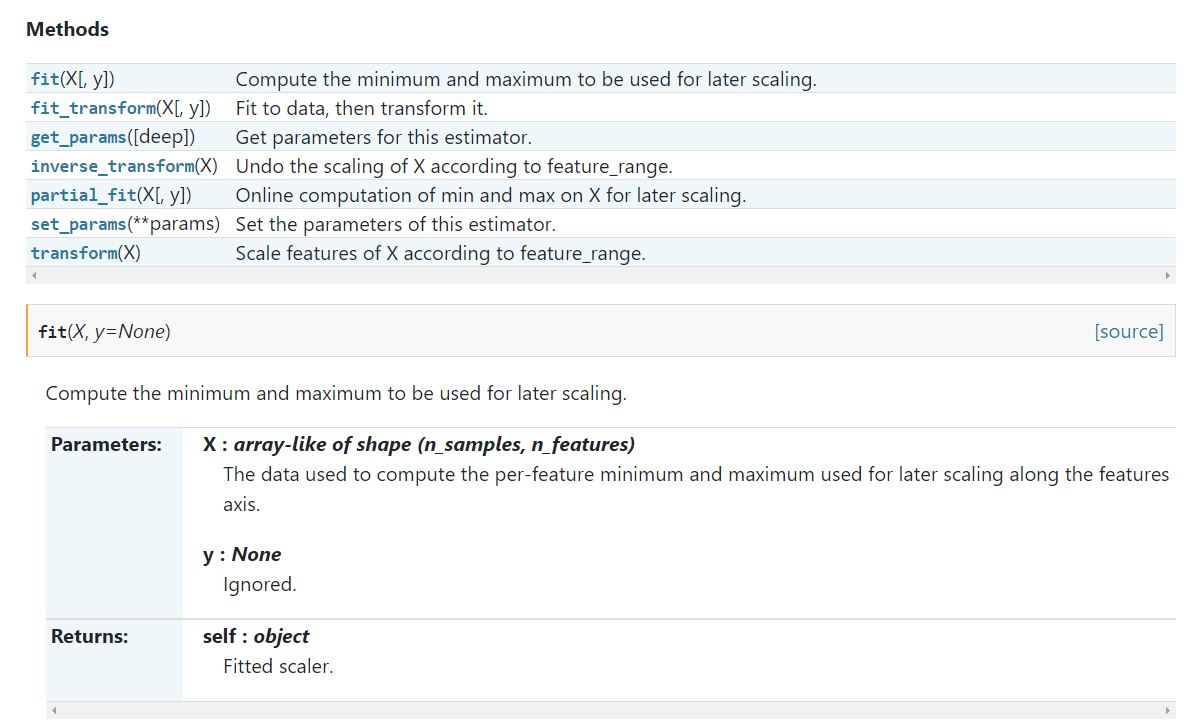

# 2. Core API
It is time for some hands-on exercise! Firstly, we will use the datasets module and get one of the example (toy) datasets that are available within sklearn. In this case, it will be iris.

In [2]:
# Load the module
from sklearn import datasets
# Get the dataset
iris = datasets.load_iris()
#It is a complex object, so we extract just a subset of the data.
toy_data = iris.data[1:5]
toy_data

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Let's now see if the API is really as powerful and standardized as we mentioned within the lecture. We will attempt to implement the `MinMaxScaler`. Based on what we know, a mere (1) instantiation, (2) fit and (3) transform should be sufficient.

In [3]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate
scaler = MinMaxScaler()

# Fit
scaler.fit(toy_data)

# Transform
scaler.transform(toy_data)

array([[0.75      , 0.        , 0.5       , 0.        ],
       [0.25      , 0.33333333, 0.        , 0.        ],
       [0.        , 0.16666667, 1.        , 0.        ],
       [1.        , 1.        , 0.5       , 0.        ]])

The transformation went through! Supposedly, the transformer should also be trained and contain the states required to replicate this transformation. We can examine its attributes.

In [4]:
scaler.data_range_

array([0.4, 0.6, 0.2, 0. ])

This looks fairly reasonable. If we look at the third column of the original data, it indeed ranges between 1.3 and 1.5. The transformer learned that its range was 0.2.

## TASK: Your turn
Your task is now to try your first transformation with sklearn. Please use the same dataset (`toy_data`) and use `StandardScaler` from the preprocessing module. For now, please do not worry what exactly the transformer is doing. In a few lectures from now you will learn about it. It is important that you have your first touch with the Core API.

In [5]:
## Your code goes here

array([[ 0.63245553, -0.98787834,  0.        ,  0.        ],
       [-0.63245553, -0.10976426, -1.41421356,  0.        ],
       [-1.26491106, -0.5488213 ,  1.41421356,  0.        ],
       [ 1.26491106,  1.6464639 ,  0.        ,  0.        ]])

# 3. Advanced API
In the upcoming lectures you are going to learn about a lot of individual transformations we can perform, as well as quite a few predictive models that you can implement.  

Once we do that, we will arrive at the topic of **composite estimators**. These are part of the Advanced API that sklearn offers. We will learn that it is important to **encapsulate and wrap together** our transformations and predictive models. 

## 3.1 Without Advanced API: Ugly
Let's at first see what life would look like if there weren't composite estimators.  

We want the following to happen:


*   Our **feature engineering** should contain two steps that follow each other - (1) StandardScaler (2) PCA reduction.
*   On top of our engineered features we would like to fit a **predictive model** - DecisionTree.  

Please do not worry if you are not sure what these steps conceptually represent. We will learn that soon, now we are focused on the Advanced API.

In [6]:
# Load the module
from sklearn import datasets

# Get the dataset
iris = datasets.load_iris()
X_train = iris.data
y_train = iris.target

In [7]:
#Import what we need
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

# Instantiate the 3 transformers/estimators
scaler = StandardScaler()
pca = PCA(n_components=2)
decision_tree = DecisionTreeClassifier(max_depth=2)

We have the transformers instantiated. Now observe how I need to fit and transform the data through one transformer at a time.

In [8]:
#Scaler first
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

#PCA second
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

#Decision Tree finally
decision_tree.fit(X_train_pca, y_train)
decision_tree.predict(X_train_pca)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1])

Even though it might not look like it from this simple example, this is really not optimal. You can imagine that with a complex dataset the number of various transformations that we would like to employ is high. Notice also how we are coming up with an alternation of the name of our training data after it undergoes certain transformation. This is very prone to some typo or error.  

## 3.2 With Advanced API: Pretty & Neat
The fact that the Basic API is so standardized allowed developers to develop **composite estimators**. In this example, we will use one of these called **pipeline**. We will learn about more composite estimators later on.

In [9]:
#Import what we need
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

#Compose an entire predictive pipeline at once!
predictive_pipeline = Pipeline(([('scaler', StandardScaler()), 
                                 ('pca', PCA(n_components=2)),
                                 ('decision_tree', DecisionTreeClassifier(max_depth=2))
                                 ]))
#Now we fit the whole pipeline with single call!
predictive_pipeline.fit(X_train, y_train)

#All that is left is to predict - again with the whole pipeline at once.
predictive_pipeline.predict(X_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1])

This is an example of how powerful the advanced API is. Notice, for example, how the first two operations are fitted without the target feature (`y_train`). You can see this by examining our previous code were we fitted them individually. The third estimator, however, is a supervised model that needs the target feature.  

The pipeline is smart enough to provide target feature only to the estimators that need it and we do not have to worry about it, as we are providing the pipeline with both the independent features and a target feature.

# 4. Key Takeaways
Alright, let's summarize some key takeaways:


1.   It is highly recommended to be comfortable with navigating through the documentation of sklearn, just as we introduced it.
2.   Understanding the Core API is very important, as it will be our bread and butter within the upcoming hands-on materials.
3.   Appreciation that there is Advanced API. We will not work with it right away. Only once we go through all individual components of predictive pipeline, we will learn how to wrap these efficiently into composite transformers.  

Material adapted for RBI internal purposes with full permissions from original authors. [Source](https://github.com/zatkopatrik/authentic-data-science) 